In [119]:
# Importing libraries

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout, Activation, Dense, Flatten, BatchNormalization, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from sklearn.metrics import r2_score
import keras.backend as K

from scipy.io import loadmat
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import glob
import re

%matplotlib notebook
from keras_sequential_ascii import keras2ascii
from sklearn.metrics import r2_score

In [121]:
# Normal data: D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumDat

Folder1 = r"<INSERT PATH HERE>"

folder1 = (os.path.join(Folder1,r'*.csv'))
print(folder1)

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\*.csv


In [122]:
# Flipped data: D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData

Folder2 = r"<INSERT PATH HERE>"

folder2 = (os.path.join(Folder2,r'*.csv'))
print(folder2)

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\*.csv


In [123]:
# Validation data: D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All

val_folder_path = r"<INSERT PATH HERE>"

val_folder = (os.path.join(val_folder_path,r'*.csv'))
print(val_folder)

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\*.csv


In [124]:
# Concatenating normal data

labels = []    # Is a list
sensor_dat = []    # Is a list
for name in glob.glob(folder1):
    epot_data = np.loadtxt(name, delimiter=",") 

    P1 = epot_data[:,2].reshape(100,1)
    P1 = 0.1+0.8*(P1-np.min(P1))/(np.max(P1)-np.min(P1))
    P2 = epot_data[:,3].reshape(100,1)
    P2 = 0.1+0.8*(P2-np.min(P2))/(np.max(P2)-np.min(P2))
    P3 = epot_data[:,4].reshape(100,1)
    P3 = 0.1+0.8*(P3-np.min(P3))/(np.max(P3)-np.min(P3))
    P4 = epot_data[:,5].reshape(100,1)
    P4 = 0.1+0.8*(P4-np.min(P4))/(np.max(P4)-np.min(P4))
    
    file_dat = np.hstack([P1, P2, P3, P4])
    sensor_dat.append(file_dat)
    
    print(name)
    fpath = name
    
    split_name = re.split(r"\\", name)
    coords = re.split("_|\.", split_name[-1])
#     print(coords)
    
    x_coord = coords[0]
    y_coord = coords[1]
    pos = [int(x_coord), int(y_coord)]
    print(pos)
    labels.append(pos)

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\175_175.csv
[175, 175]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\175_180.csv
[175, 180]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\175_185.csv
[175, 185]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\175_190.csv
[175, 190]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\175_195.csv
[175, 195]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\175_200.csv
[175, 200]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\175_205.csv
[175, 205]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\175_210.csv
[175, 210]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\175_215.csv
[175, 215]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_c

[185, 300]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\185_305.csv
[185, 305]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\185_310.csv
[185, 310]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\185_315.csv
[185, 315]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\185_320.csv
[185, 320]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\185_325.csv
[185, 325]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\190_175.csv
[190, 175]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\190_180.csv
[190, 180]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\190_185.csv
[190, 185]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\190_190.csv
[190, 190]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\200_235.csv
[200, 235]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\200_240.csv
[200, 240]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\200_245.csv
[200, 245]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\200_250.csv
[200, 250]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\200_255.csv
[200, 255]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\200_260.csv
[200, 260]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\200_265.csv
[200, 265]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\200_270.csv
[200, 270]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\200_275.csv
[200, 275]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_c

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\215_210.csv
[215, 210]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\215_215.csv
[215, 215]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\215_220.csv
[215, 220]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\215_225.csv
[215, 225]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\215_230.csv
[215, 230]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\215_235.csv
[215, 235]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\215_240.csv
[215, 240]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\215_260.csv
[215, 260]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\215_265.csv
[215, 265]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_c

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\230_195.csv
[230, 195]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\230_200.csv
[230, 200]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\230_205.csv
[230, 205]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\230_210.csv
[230, 210]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\230_215.csv
[230, 215]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\230_220.csv
[230, 220]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\230_225.csv
[230, 225]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\230_230.csv
[230, 230]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\230_235.csv
[230, 235]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_c

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\240_320.csv
[240, 320]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\240_325.csv
[240, 325]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\245_175.csv
[245, 175]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\245_180.csv
[245, 180]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\245_185.csv
[245, 185]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\245_190.csv
[245, 190]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\245_195.csv
[245, 195]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\245_200.csv
[245, 200]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\245_205.csv
[245, 205]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_c

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\260_230.csv
[260, 230]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\260_235.csv
[260, 235]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\260_240.csv
[260, 240]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\260_245.csv
[260, 245]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\260_250.csv
[260, 250]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\260_255.csv
[260, 255]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\260_260.csv
[260, 260]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\260_265.csv
[260, 265]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\260_270.csv
[260, 270]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_c

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\270_320.csv
[270, 320]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\270_325.csv
[270, 325]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\275_175.csv
[275, 175]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\275_180.csv
[275, 180]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\275_185.csv
[275, 185]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\275_190.csv
[275, 190]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\275_195.csv
[275, 195]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\275_200.csv
[275, 200]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\275_205.csv
[275, 205]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_c

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\290_180.csv
[290, 180]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\290_185.csv
[290, 185]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\290_190.csv
[290, 190]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\290_195.csv
[290, 195]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\290_200.csv
[290, 200]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\290_205.csv
[290, 205]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\290_210.csv
[290, 210]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\290_215.csv
[290, 215]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\290_220.csv
[290, 220]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_c

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\300_320.csv
[300, 320]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\300_325.csv
[300, 325]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\305_175.csv
[305, 175]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\305_180.csv
[305, 180]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\305_185.csv
[305, 185]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\305_190.csv
[305, 190]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\305_195.csv
[305, 195]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\305_200.csv
[305, 200]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\305_205.csv
[305, 205]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_c

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\315_250.csv
[315, 250]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\315_255.csv
[315, 255]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\315_260.csv
[315, 260]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\315_265.csv
[315, 265]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\315_270.csv
[315, 270]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\315_275.csv
[315, 275]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\315_280.csv
[315, 280]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\315_285.csv
[315, 285]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\FinalNumData\315_290.csv
[315, 290]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_c

In [125]:
# Concatenating flipped data

for name in glob.glob(folder2):
    epot_data = np.loadtxt(name, delimiter=",") 

    P1 = epot_data[:,2].reshape(100,1)
    P1 = 0.1+0.8*(P1-np.min(P1))/(np.max(P1)-np.min(P1))
    P2 = epot_data[:,3].reshape(100,1)
    P2 = 0.1+0.8*(P2-np.min(P2))/(np.max(P2)-np.min(P2))
    P3 = epot_data[:,4].reshape(100,1)
    P3 = 0.1+0.8*(P3-np.min(P3))/(np.max(P3)-np.min(P3))
    P4 = epot_data[:,5].reshape(100,1)
    P4 = 0.1+0.8*(P4-np.min(P4))/(np.max(P4)-np.min(P4))
    
    file_dat = np.hstack([P1, P2, P3, P4])
    sensor_dat.append(file_dat)
    
    print(name)
#     fpath = name
    
    split_name = re.split(r"\\", name)
    coords = re.split("_|\.", split_name[-1])
#     print(coords)
    
    x_coord = coords[0]
    y_coord = coords[1]
    pos = [int(x_coord), int(y_coord)]
    print(pos)
    labels.append(pos)

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\175_175.csv
[175, 175]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\175_180.csv
[175, 180]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\175_185.csv
[175, 185]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\175_190.csv
[175, 190]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\175_195.csv
[175, 195]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\175_200.csv
[175, 200]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\175_205.csv
[175, 205]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\175_210.csv
[175, 210]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\175_215.csv
[175, 215]
D:\CAME\Coursework\Sem_3\CIE\Exercise

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\185_310.csv
[185, 310]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\185_315.csv
[185, 315]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\185_320.csv
[185, 320]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\185_325.csv
[185, 325]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\190_175.csv
[190, 175]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\190_180.csv
[190, 180]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\190_185.csv
[190, 185]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\190_190.csv
[190, 190]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\190_195.csv
[190, 195]
D:\CAME\Coursework\Sem_3\CIE\Exercise

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\200_240.csv
[200, 240]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\200_245.csv
[200, 245]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\200_250.csv
[200, 250]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\200_255.csv
[200, 255]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\200_260.csv
[200, 260]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\200_265.csv
[200, 265]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\200_270.csv
[200, 270]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\200_275.csv
[200, 275]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\200_280.csv
[200, 280]
D:\CAME\Coursework\Sem_3\CIE\Exercise

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\215_180.csv
[215, 180]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\215_185.csv
[215, 185]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\215_190.csv
[215, 190]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\215_195.csv
[215, 195]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\215_200.csv
[215, 200]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\215_205.csv
[215, 205]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\215_210.csv
[215, 210]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\215_215.csv
[215, 215]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\215_220.csv
[215, 220]
D:\CAME\Coursework\Sem_3\CIE\Exercise

[230, 190]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\230_195.csv
[230, 195]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\230_200.csv
[230, 200]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\230_205.csv
[230, 205]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\230_210.csv
[230, 210]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\230_215.csv
[230, 215]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\230_220.csv
[230, 220]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\230_225.csv
[230, 225]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\230_230.csv
[230, 230]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\230_235.csv
[230, 235]
D:\CAME\Coursework\Sem_3\C

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\240_300.csv
[240, 300]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\240_305.csv
[240, 305]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\240_310.csv
[240, 310]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\240_315.csv
[240, 315]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\240_320.csv
[240, 320]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\240_325.csv
[240, 325]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\245_175.csv
[245, 175]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\245_180.csv
[245, 180]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\245_185.csv
[245, 185]
D:\CAME\Coursework\Sem_3\CIE\Exercise

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\255_325.csv
[255, 325]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\260_175.csv
[260, 175]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\260_180.csv
[260, 180]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\260_185.csv
[260, 185]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\260_190.csv
[260, 190]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\260_195.csv
[260, 195]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\260_200.csv
[260, 200]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\260_205.csv
[260, 205]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\260_210.csv
[260, 210]
D:\CAME\Coursework\Sem_3\CIE\Exercise

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\270_265.csv
[270, 265]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\270_270.csv
[270, 270]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\270_275.csv
[270, 275]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\270_280.csv
[270, 280]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\270_285.csv
[270, 285]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\270_290.csv
[270, 290]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\270_295.csv
[270, 295]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\270_300.csv
[270, 300]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\270_305.csv
[270, 305]
D:\CAME\Coursework\Sem_3\CIE\Exercise

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\285_285.csv
[285, 285]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\285_290.csv
[285, 290]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\285_295.csv
[285, 295]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\285_300.csv
[285, 300]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\285_305.csv
[285, 305]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\285_310.csv
[285, 310]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\285_315.csv
[285, 315]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\285_320.csv
[285, 320]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\285_325.csv
[285, 325]
D:\CAME\Coursework\Sem_3\CIE\Exercise

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\300_270.csv
[300, 270]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\300_275.csv
[300, 275]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\300_280.csv
[300, 280]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\300_285.csv
[300, 285]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\300_290.csv
[300, 290]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\300_295.csv
[300, 295]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\300_300.csv
[300, 300]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\300_305.csv
[300, 305]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\300_310.csv
[300, 310]
D:\CAME\Coursework\Sem_3\CIE\Exercise

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\315_205.csv
[315, 205]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\315_210.csv
[315, 210]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\315_215.csv
[315, 215]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\315_220.csv
[315, 220]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\315_225.csv
[315, 225]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\315_230.csv
[315, 230]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\315_235.csv
[315, 235]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\315_240.csv
[315, 240]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\315_245.csv
[315, 245]
D:\CAME\Coursework\Sem_3\CIE\Exercise

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\325_280.csv
[325, 280]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\325_285.csv
[325, 285]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\325_290.csv
[325, 290]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\325_295.csv
[325, 295]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\325_300.csv
[325, 300]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\325_305.csv
[325, 305]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\325_310.csv
[325, 310]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\325_315.csv
[325, 315]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Flipped_NumData\325_320.csv
[325, 320]
D:\CAME\Coursework\Sem_3\CIE\Exercise

In [126]:
# # Concatenating validation data

for name in glob.glob(val_folder):
    val_data = np.loadtxt(name, delimiter=",") 

    P1 = val_data[:,2].reshape(100,1)
    P1 = 0.1+0.8*(P1-np.min(P1))/(np.max(P1)-np.min(P1))
    P2 = val_data[:,3].reshape(100,1)
    P2 = 0.1+0.8*(P2-np.min(P2))/(np.max(P2)-np.min(P2))
    P3 = val_data[:,4].reshape(100,1)
    P3 = 0.1+0.8*(P3-np.min(P3))/(np.max(P3)-np.min(P3))
    P4 = val_data[:,5].reshape(100,1)
    P4 = 0.1+0.8*(P4-np.min(P4))/(np.max(P4)-np.min(P4))
    
    val_file_dat = np.hstack([P1, P2, P3, P4])
    sensor_dat.append(val_file_dat)
    
    print(name)
#     fpath = name
    
    split_name = re.split(r"\\", name)
    val_coords = re.split("_|\.", split_name[-1])
#     print(coords)
    
    val_x_coord = val_coords[0]
    val_y_coord = val_coords[1]
    val_pos = [int(val_x_coord), int(val_y_coord)]
    print(val_pos)
    labels.append(val_pos)

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\203_198.csv
[203, 198]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\204_199.csv
[204, 199]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\206_201.csv
[206, 201]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\207_202.csv
[207, 202]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\223_208.csv
[223, 208]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\224_209.csv
[224, 209]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\226_211.csv
[226, 211]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\227_212.csv
[227, 212]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\228_243.csv
[228, 243]
D:\CAME\Coursework\Sem_3\CIE

In [127]:
sensor_dat = np.asarray(sensor_dat)

labels = np.asarray(labels)

sensor_dat.shape, labels.shape, file_dat.shape

((1874, 100, 4), (1874, 2), (100, 4))

In [128]:
sensor_dat = sensor_dat.astype(float)
labels = labels.astype(float)
sensor_dat.dtype, labels.dtype

(dtype('float64'), dtype('float64'))

In [129]:
X = sensor_dat
y = labels

In [130]:
# Normalising labels

y = (y-175)/(325-175)

In [131]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, shuffle=True)

In [132]:
X_train[0].shape, X_test[0].shape, y_train[0].shape, y_test[0].shape

((100, 4), (100, 4), (2,), (2,))

In [133]:
# Building the CNN model

model = models.Sequential()

model.add(Conv1D(128, 10, activation='relu', input_shape=(X_train[0].shape)))
model.add(Conv1D(128, 10, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(192, 10, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(192, 10, activation='relu'))

model.add(GlobalAveragePooling1D())

model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))

model.add(Dense(2, activation="relu"))

print(model.summary())


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 91, 128)           5248      
                                                                 
 conv1d_25 (Conv1D)          (None, 82, 128)           163968    
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 41, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_26 (Conv1D)          (None, 32, 192)           245952    
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 16, 192)          0         
 g1D)                                                            
                                                                 
 conv1d_27 (Conv1D)          (None, 7, 192)           

In [134]:
model.compile('adam', loss= 'mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [135]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.01)

Epoch 1/50
58/58 [==============================] - 13s 196ms/step - loss: 0.1227 - root_mean_squared_error: 0.3503 - val_loss: 0.0942 - val_root_mean_squared_error: 0.3070
Epoch 2/50
58/58 [==============================] - 12s 212ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760 - val_loss: 0.0716 - val_root_mean_squared_error: 0.2676
Epoch 3/50
58/58 [==============================] - 13s 228ms/step - loss: 0.0646 - root_mean_squared_error: 0.2542 - val_loss: 0.0563 - val_root_mean_squared_error: 0.2373root_mean_squared_er
Epoch 4/50
58/58 [==============================] - 9s 160ms/step - loss: 0.0396 - root_mean_squared_error: 0.1991 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1376
Epoch 5/50
58/58 [==============================] - 10s 176ms/step - loss: 0.0151 - root_mean_squared_error: 0.1230 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0616
Epoch 6/50
58/58 [==============================] - 11s 189ms/step - loss: 0.0053 - root_mean_squared_error: 0.0727 

In [136]:
test_metric_1, test_metric_2 = model.evaluate(X_test, y_test)

print('Tested Metric 1: ', test_metric_1)    # MSE
print('Tested Metric 2: ', test_metric_2)    # RMSE

1/1 [==============================] - 0s 67ms/step - loss: 4.2948e-04 - root_mean_squared_error: 0.0207
Tested Metric 1:  0.000429476989666
Tested Metric 2:  0.020723827183246613


In [137]:
y_p = X_test[:]
y_p = y_p.astype(float)

In [138]:
y_pred = model.predict(y_p)
y_pred = y_pred*150+175

In [139]:
# error_ar = (y_test[:]*150+175) - y_pred
# measure = error_ar[:, 0]*error_ar[:, 0] + error_ar[:,1]*error_ar[:,1] 
# error = np.sqrt(measure)
# plt.plot(error)
# print(np.mean(error))

In [ ]:
# # Losses vs Epochs

# loss_train = history.history['loss']
# loss_val = history.history['val_loss']
# epochs = range(0,50)
# plt.plot(epochs, loss_train, 'g', label='Training loss')
# plt.plot(epochs, loss_val, 'b', label='Validation loss')
# plt.title('Training and Validation Losses vs Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [141]:
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####    100    4
              Conv1D    \|/  -------------------      5248     0.6%
                relu   #####     91  128
              Conv1D    \|/  -------------------    163968    18.7%
                relu   #####     82  128
        MaxPooling1D   Y max -------------------         0     0.0%
                       #####     41  128
              Conv1D    \|/  -------------------    245952    28.1%
                relu   #####     32  192
        MaxPooling1D   Y max -------------------         0     0.0%
                       #####     16  192
              Conv1D    \|/  -------------------    368832    42.1%
                relu   #####      7  192
GlobalAveragePooling1D   Y^avg -------------------         0     0.0%
                       #####         192
               Dense   XXXXX -------------------     49408     5.6%
                relu   #####         256
           

# Experimental Validation

In [142]:
# Path to validation data

val_folder_path = r"<INSERT PATH HERE>"
val_folder = (os.path.join(val_folder_path,r'*.csv'))
print(val_folder)

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\*.csv


In [143]:
val_labels = []    # Is a list
val_sensor_dat = []    # Is a list
for name in glob.glob(val_folder):
    val_data = np.loadtxt(name, delimiter=",") 

    P1 = val_data[:,2].reshape(100,1)
    P1 = 0.1+0.8*(P1-np.min(P1))/(np.max(P1)-np.min(P1))
    P2 = val_data[:,3].reshape(100,1)
    P2 = 0.1+0.8*(P2-np.min(P2))/(np.max(P2)-np.min(P2))
    P3 = val_data[:,4].reshape(100,1)
    P3 = 0.1+0.8*(P3-np.min(P3))/(np.max(P3)-np.min(P3))
    P4 = val_data[:,5].reshape(100,1)
    P4 = 0.1+0.8*(P4-np.min(P4))/(np.max(P4)-np.min(P4))
    
    val_file_dat = np.hstack([P1, P2, P3, P4])
    val_sensor_dat.append(val_file_dat)
    
    print(name)
#     fpath = name
    
    split_name = re.split(r"\\", name)
    val_coords = re.split("_|\.", split_name[-1])
#     print(coords)
    
    val_x_coord = val_coords[0]
    val_y_coord = val_coords[1]
    val_pos = [int(val_x_coord), int(val_y_coord)]
    print(val_pos)
    val_labels.append(val_pos)

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\203_198.csv
[203, 198]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\204_199.csv
[204, 199]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\206_201.csv
[206, 201]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\207_202.csv
[207, 202]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\223_208.csv
[223, 208]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\224_209.csv
[224, 209]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\226_211.csv
[226, 211]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\227_212.csv
[227, 212]
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\CNN_code\Fin_Val_Data\All\228_243.csv
[228, 243]
D:\CAME\Coursework\Sem_3\CIE

In [144]:
val_sensor_dat = np.asarray(val_sensor_dat)

val_labels = np.asarray(val_labels)

val_sensor_dat.shape, val_labels.shape, val_file_dat.shape

((24, 100, 4), (24, 2), (100, 4))

In [145]:
val_sensor_dat = val_sensor_dat.astype(float)
val_labels = val_labels.astype(float)
val_sensor_dat.dtype, val_labels.dtype

(dtype('float64'), dtype('float64'))

In [146]:
val_labels

array([[203., 198.],
       [204., 199.],
       [206., 201.],
       [207., 202.],
       [223., 208.],
       [224., 209.],
       [226., 211.],
       [227., 212.],
       [228., 243.],
       [229., 244.],
       [231., 246.],
       [232., 247.],
       [238., 253.],
       [239., 254.],
       [241., 256.],
       [242., 257.],
       [248., 258.],
       [249., 259.],
       [251., 261.],
       [252., 262.],
       [298., 233.],
       [299., 234.],
       [301., 236.],
       [302., 237.]])

In [147]:
val_y_pred = model.predict(val_sensor_dat)
val_y_pred = val_y_pred*150+175
val_y_pred

array([[207.52188, 199.56331],
       [208.43121, 199.5031 ],
       [209.07304, 201.0523 ],
       [209.99892, 203.61404],
       [226.58128, 210.3422 ],
       [226.91751, 210.3212 ],
       [227.83147, 211.4734 ],
       [226.91106, 211.85875],
       [229.461  , 246.45792],
       [230.6397 , 247.77734],
       [227.8024 , 246.80573],
       [227.9398 , 247.98993],
       [239.68857, 251.66904],
       [239.81409, 255.5668 ],
       [242.8571 , 255.18114],
       [242.22748, 254.04477],
       [251.9465 , 261.81592],
       [249.72919, 260.84747],
       [252.81815, 260.75134],
       [252.05855, 262.42963],
       [300.43884, 235.4289 ],
       [300.6847 , 236.3717 ],
       [302.76517, 236.68423],
       [300.4248 , 235.77907]], dtype=float32)

In [148]:
val_labels_norm = (val_labels-175)/(325-175)

<IPython.core.display.Javascript object>


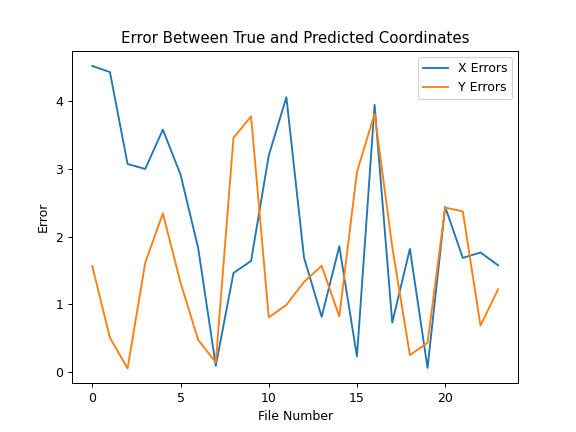

RMS Error X:  2.1835943857828775
RMS Error Y:  1.5317090352376301


In [149]:
# Difference betweeen actual coordinates and predicted coordinates

val_error_ar = val_labels[:] - val_y_pred
val_measure_x = val_error_ar[:, 0]*val_error_ar[:, 0]
val_measure_y = val_error_ar[:,1]*val_error_ar[:,1] 
val_error_x = np.sqrt(val_measure_x)
val_error_y = np.sqrt(val_measure_y)

plt.title('Error Between True and Predicted Coordinates')
plt.xlabel('File Number')
plt.ylabel('Error')
plt.plot(val_error_x, label='X Errors')
plt.plot(val_error_y, label='Y Errors')
plt.legend()
plt.show()

print('RMS Error X: ', np.mean(val_error_x))
print('RMS Error Y: ', np.mean(val_error_y))

In [150]:
# Mean Detection Radius

r_mean = np.mean(np.sqrt(val_measure_x+val_measure_y))
print('Mean Detection Radius: ', r_mean)

Mean Detection Radius:  2.8959734481230917


In [151]:
val_loss, val_acc = model.evaluate(val_sensor_dat, val_labels_norm)

1/1 [==============================] - 0s 92ms/step - loss: 2.2364e-04 - root_mean_squared_error: 0.0150


In [152]:
ytrue = val_labels
ypred = val_y_pred

In [153]:
# R2 Score

r2_score_1 = r2_score(ytrue, ypred)
print('The R2 Score is: ', r2_score_1)

The R2 Score is:  0.9926958087005378


# Final Prediction

In [192]:
# Pah to data to be predicted

pred_folder_path = r"<INSERT PATH HERE>"
pred_folder = (os.path.join(pred_folder_path,r'*.csv'))
print(pred_folder)

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\DATA\Cut_Exp_Data\*.csv


In [193]:
pred_labels = []    # Is a list
pred_sensor_dat = []    # Is a list
for name in glob.glob(pred_folder):
    pred_data = np.loadtxt(name, dtype = str, delimiter=",") 

    P1 = pred_data[1:,1].reshape(100,1)
    P1 = P1.astype(float)
    P1 = 0.1+0.8*(P1-np.min(P1))/(np.max(P1)-np.min(P1))
    P2 = pred_data[1:,2].reshape(100,1)
    P2 = P2.astype(float)
    P2 = 0.1+0.8*(P2-np.min(P2))/(np.max(P2)-np.min(P2))
    P3 = pred_data[1:,3].reshape(100,1)
    P3 = P3.astype(float)
    P3 = 0.1+0.8*(P3-np.min(P3))/(np.max(P3)-np.min(P3))
    P4 = pred_data[1:,4].reshape(100,1)
    P4 = P4.astype(float)
    P4 = 0.1+0.8*(P4-np.min(P4))/(np.max(P4)-np.min(P4))
    
    pred_file_dat = np.hstack([P1, P2, P3, P4])
    pred_sensor_dat.append(pred_file_dat)
    
    print(name)
#     print(pred_file_dat)
#     fpath = name
    
#     split_name = re.split(r"\\", name)
#     pred_coords = re.split("_|\.", split_name[-1])
# #     print(coords)
    
#     pred_x_coord = pred_coords[0]
#     pred_y_coord = pred_coords[1]
#     pred_pos = [int(pred_x_coord), int(pred_y_coord)]
#     print(pred_pos)
#     pred_labels.append(pred_pos)

D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\DATA\Cut_Exp_Data\impact_xy_002.csv
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\DATA\Cut_Exp_Data\impact_xy_003.csv
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\DATA\Cut_Exp_Data\impact_xy_004.csv
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\DATA\Cut_Exp_Data\impact_xy_005.csv
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\DATA\Cut_Exp_Data\impact_xy_006.csv
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\DATA\Cut_Exp_Data\impact_xy_010.csv
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\DATA\Cut_Exp_Data\impact_xy_011.csv
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\DATA\Cut_Exp_Data\impact_xy_020.csv
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\DATA\Cut_Exp_Data\impact_xy_023.csv
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_ProjectB\Code\DATA\Cut_Exp_Data\impact_xy_025.csv
D:\CAME\Coursework\Sem_3\CIE\Exercises\Week9_Proje

In [194]:
pred_sensor_dat = np.asarray(pred_sensor_dat)

# val_labels = np.asarray(val_labels)

pred_sensor_dat.shape, pred_file_dat.shape    #  val_labels.shape,

((18, 100, 4), (100, 4))

In [195]:
pred_sensor_dat = pred_sensor_dat.astype(float)
# val_labels = val_labels.astype(float)
pred_sensor_dat.dtype    # val_labels.dtype

dtype('float64')

In [196]:
pred_sensor_dat

array([[[0.53532741, 0.47975582, 0.37650339, 0.45572488],
        [0.53530993, 0.47981652, 0.37636227, 0.45568001],
        [0.5354498 , 0.47980135, 0.37600165, 0.45557532],
        ...,
        [0.84822862, 0.57917141, 0.25232401, 0.46442883],
        [0.84773923, 0.57548372, 0.24555059, 0.45840186],
        [0.84618294, 0.572631  , 0.23821271, 0.45298807]],

       [[0.51430142, 0.34010258, 0.56296239, 0.59318473],
        [0.51444   , 0.34010258, 0.56317713, 0.59318473],
        [0.51441228, 0.34000949, 0.56314645, 0.59315099],
        ...,
        [0.54620276, 0.27600392, 0.66465386, 0.87736134],
        [0.53661298, 0.27456094, 0.65885609, 0.87189575],
        [0.5268846 , 0.27158175, 0.6550211 , 0.86518219]],

       [[0.58084205, 0.341247  , 0.39694663, 0.58979918],
        [0.58061784, 0.34128057, 0.39691646, 0.5897737 ],
        [0.58071749, 0.34126378, 0.39684106, 0.58987562],
        ...,
        [0.38039387, 0.22392152, 0.10945632, 0.66931742],
        [0.40814649, 0.214137

In [200]:
# Predicted labels

pred_y_pred = model.predict(pred_sensor_dat)
pred_y_pred = pred_y_pred*150+175
print('The predicted coordinates are: ')
print()
print(pred_y_pred)

The predicted coordinates are: 

[[250.40927 241.81824]
 [244.29913 252.49347]
 [234.43887 230.54068]
 [260.09232 262.90793]
 [267.91528 205.08632]
 [243.81743 254.07822]
 [263.5108  228.34229]
 [255.88474 304.65497]
 [232.01022 228.42133]
 [251.49237 265.9901 ]
 [292.58423 284.42725]
 [268.6488  295.97614]
 [208.0087  230.34666]
 [242.37744 247.51462]
 [232.68745 302.3921 ]
 [272.4113  253.61182]
 [247.54839 246.4279 ]
 [228.28972 205.60934]]


# Hyperparameter Tuning

In [21]:
# %load_ext tensorboard    # The tensorboard extension is already loaded. To reload it, use: %reload_ext tensorboard

In [22]:
# rm -rf ./logs/

In [457]:
from tensorboard.plugins.hparams import api as hp
import keras_tuner as kt

In [464]:
# Bulding model to be tuned

def build_model(hp):
    model = tf.keras.models.Sequential()
        
    model.add(Conv1D(filters=hp.Int('filters', min_value=100, max_value=300, step=10),
                     kernel_size=8,
                     activation = 'relu', 
                     input_shape=(100,4))),
    
#     kernel_size=hp.Int('kernel_size', min_value=6, max_value=14, step=2),
        
    model.add(Conv1D(filters=hp.Int('filters', min_value=100, max_value=300, step=10),
                     kernel_size=8,
                     activation = 'relu',
                     input_shape=(100,4))),
        
    model.add(MaxPooling1D(2)),
        
    model.add(Conv1D(filters=hp.Int('filters', min_value=100, max_value=300, step=10),
                     kernel_size=8,
                     activation = 'relu', 
                     input_shape=(100,4))),
        
    model.add(MaxPooling1D(2)),
        
    model.add(Conv1D(filters=hp.Int('filters', min_value=100, max_value=300, step=10),
                     kernel_size=8,
                     activation = 'relu',
                     input_shape=(100,4))),
        
    model.add(GlobalAveragePooling1D()),
        
    model.add(Dropout(0.1)),

    model.add(Dense(units=hp.Int('units', min_value=100, max_value=300, step=10), activation="relu")),

    model.add(Dense(units=hp.Int('units', min_value=100, max_value=300, step=10), activation="relu")),
    model.add(Dense(units=hp.Int('units', min_value=100, max_value=300, step=10), activation="relu")),

    model.add(Dense(2, activation="relu")),
        
        
    model.compile(optimizer='Adam',
                  loss='mse',
                  metrics=['accuracy']),
    
#     (hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
                
    return model

In [465]:
# def run(run_dir, hparams):
#     with tf.summary.create_file_writer(run_dir).as_default():
#         hp.hparams(hparams)  # record the values used in this trial
#         accuracy = train_test_model(hparams)
#         tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [466]:
# session_num = 0

# for num_filters in (hparams['filters'].domain.min_value, hparams['filters'].domain.max_value):
#     for kernel_size_idx in (hparams['kernel_size'].domain.min_value, hparams['kernel_size'].domain.max_value):
#         for dropout_rate in (hparams['rate'].domain.min_value, hparams['rate'].domain.max_value):
#             for optimizer_rate in hparams['learning_rate'].values:
#                 hparams = 1
#                 run_name = "run-%d" % session_num
#                 print('--- Starting trial: %s' % run_name)
#                 print({h.name: hp.hparams[h] for h in hp.hparams})
#                 run('logs/hparam_tuning/' + run_name, hp.hparams)
#                 session_num += 1

In [467]:
# Tuner settings

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=1000,
    executions_per_trial=1,
    overwrite=True,
    )

In [468]:
# Search space summary

tuner.search_space_summary()

Search space summary
Default search space size: 2
filters (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 300, 'step': 10, 'sampling': None}
units (Int)
{'default': None, 'conditions': [], 'min_value': 100, 'max_value': 300, 'step': 10, 'sampling': None}


In [469]:
tuner.search(X_train, y_train, epochs=22, validation_data=(val_sensor_dat, val_labels_norm))

Trial 154 Complete [00h 01m 57s]
val_loss: 0.0013279997510835528

Best val_loss So Far: 0.0008468928863294423
Total elapsed time: 11h 01m 26s

Search: Running Trial #155

Hyperparameter    |Value             |Best Value So Far 
filters           |200               |280               
units             |260               |280               

Epoch 1/22
58/58 [==============================] - 13s 204ms/step - loss: 0.1398 - accuracy: 0.5057 - val_loss: 0.0297 - val_accuracy: 0.5000
Epoch 2/22
58/58 [==============================] - 11s 190ms/step - loss: 0.0807 - accuracy: 0.5085 - val_loss: 0.0430 - val_accuracy: 0.5000
Epoch 3/22
58/58 [==============================] - 11s 197ms/step - loss: 0.0685 - accuracy: 0.4872 - val_loss: 0.0383 - val_accuracy: 0.6667
Epoch 4/22
58/58 [==============================] - 12s 208ms/step - loss: 0.0637 - accuracy: 0.5194 - val_loss: 0.0171 - val_accuracy: 0.8750
Epoch 5/22
58/58 [==============================] - 12s 203ms/step - loss: 0.0507 - a

KeyboardInterrupt: 

In [470]:
best_model = tuner.get_best_models(1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 93, 280)           9240      
                                                                 
 conv1d_1 (Conv1D)           (None, 86, 280)           627480    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 43, 280)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 36, 280)           627480    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 18, 280)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 11, 280)           6

In [471]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
filters: 280
units: 280
Score: 0.0008468928863294423
Trial summary
Hyperparameters:
filters: 250
units: 180
Score: 0.0008649113588035107
Trial summary
Hyperparameters:
filters: 110
units: 250
Score: 0.0008751598070375621
Trial summary
Hyperparameters:
filters: 130
units: 220
Score: 0.0008834016625769436
Trial summary
Hyperparameters:
filters: 110
units: 210
Score: 0.0009115141001529992
Trial summary
Hyperparameters:
filters: 260
units: 300
Score: 0.0009143880452029407
Trial summary
Hyperparameters:
filters: 270
units: 270
Score: 0.0009149492834694684
Trial summary
Hyperparameters:
filters: 180
units: 130
Score: 0.0009589270339347422
Trial summary
Hyperparameters:
filters: 120
units: 210
Score: 0.0009660355281084776
Trial summary
Hyperparameters:
filters: 140
units: 300
Score: 0.0009969595121219754


# End